In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
night_max = 366
dbfile='baseline_v1.3_10yrs.db'
conn = sqlite3.connect(dbfile)
df = pd.read_sql('select observationId, sunAlt, altitude, azimuth, observationStartMJD, night from summaryallprops where night <= %i order by observationId' % night_max, conn)
conn.close()

In [3]:
hits = np.load('hit_baseline_v1.3_10yrs.npy')
df['hit'] = hits['hit']

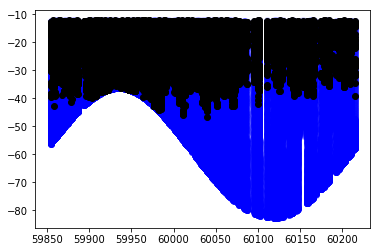

In [4]:
plt.plot(df['observationStartMJD'], df['sunAlt'], 'bo', alpha=.1)
blackout = np.where(df['hit'].values > 0)[0]
plt.plot(df['observationStartMJD'].values[blackout], df['sunAlt'].values[blackout], 'ko')

In [5]:
print('fraction of observations with hits = %f' % (blackout.size/df['hit'].values.size))

fraction of observations with hits = 0.105289


In [6]:
dt = np.where(df['sunAlt'] < -18.)[0]
dt_hit = np.where(df['hit'].values[dt] > 0)[0]
print('fraction of observations hit in non-twilight= %f' % (dt_hit.size/dt.size))

fraction of observations hit in non-twilight= 0.075108


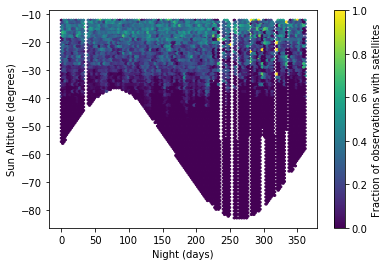

In [7]:
color = df['sunAlt']*0
color[blackout] = 1
plt.hexbin(df['observationStartMJD']-np.min(df['observationStartMJD']), df['sunAlt'], color, reduce_C_function=np.mean)
cb = plt.colorbar()
plt.xlabel('Night (days)')
plt.ylabel('Sun Altitude (degrees)')
cb.set_label('Fraction of observations with satellites')
plt.savefig('baseline_contam_12k.pdf')

In [8]:
# One year looking at how a 12k satellite constellation contaminates our baseline simulation. 
# White gaps are caused by downtime. Takeaway is that a large fraction of observations would have a satellite in
# the field of view until the sun gets below ~-30 degrees altitude. 

In [16]:
# Let's find an MJD in summer near midnight
df['observationStartMJD'].values[np.where((df['night']==76) & (df['sunAlt'] < -36.))]

array([ 59928.17217802,  59928.17259211,  59928.17300681,  59928.17342101,
        59928.17383663,  59928.17425331,  59928.17466938,  59928.17509175,
        59928.17552251,  59928.17594291,  59928.17635696,  59928.17677103,
        59928.17718714,  59928.17760693,  59928.1780293 ,  59928.17844542,
        59928.17885947,  59928.17927689,  59928.17976371,  59928.18017971,
        59928.18059576,  59928.18101184,  59928.18142688,  59928.18184092,
        59928.18225509,  59928.18267025,  59928.18308429,  59928.18349932,
        59928.18391241,  59928.18433216,  59928.18474603,  59928.18515871,
        59928.18557302,  59928.18598509,  59928.18639638,  59928.186812  ,
        59928.18722403,  59928.18764398,  59928.18806188,  59928.18847708,
        59928.18889578,  59928.18947907,  59928.18992101,  59928.19067549,
        59928.19109532,  59928.19151705,  59928.19196126,  59928.19237549,
        59928.19279619,  59928.19321709,  59928.19362851,  59928.19404912,
        59928.19446296,  